In [1]:
from run_battery import BatteryRunner, BatteryConfigs
from model_wrapper import ModelFamily
import metric
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SEED = 20001004
# bootstrap parameters
sample_size = 50
iterations = 500

# Bugs2Fix

In [3]:
runner_b2f = BatteryRunner.of(BatteryConfigs.Bugs2Fix)
runner_b2f.load_cases()

Loaded 100 cases!


In [4]:
family = ModelFamily.CodeGen1.multi
runner_b2f.run_battery(family=family, quiet=True)
runner_b2f.init_cases(family=family)

## Iterative Progress

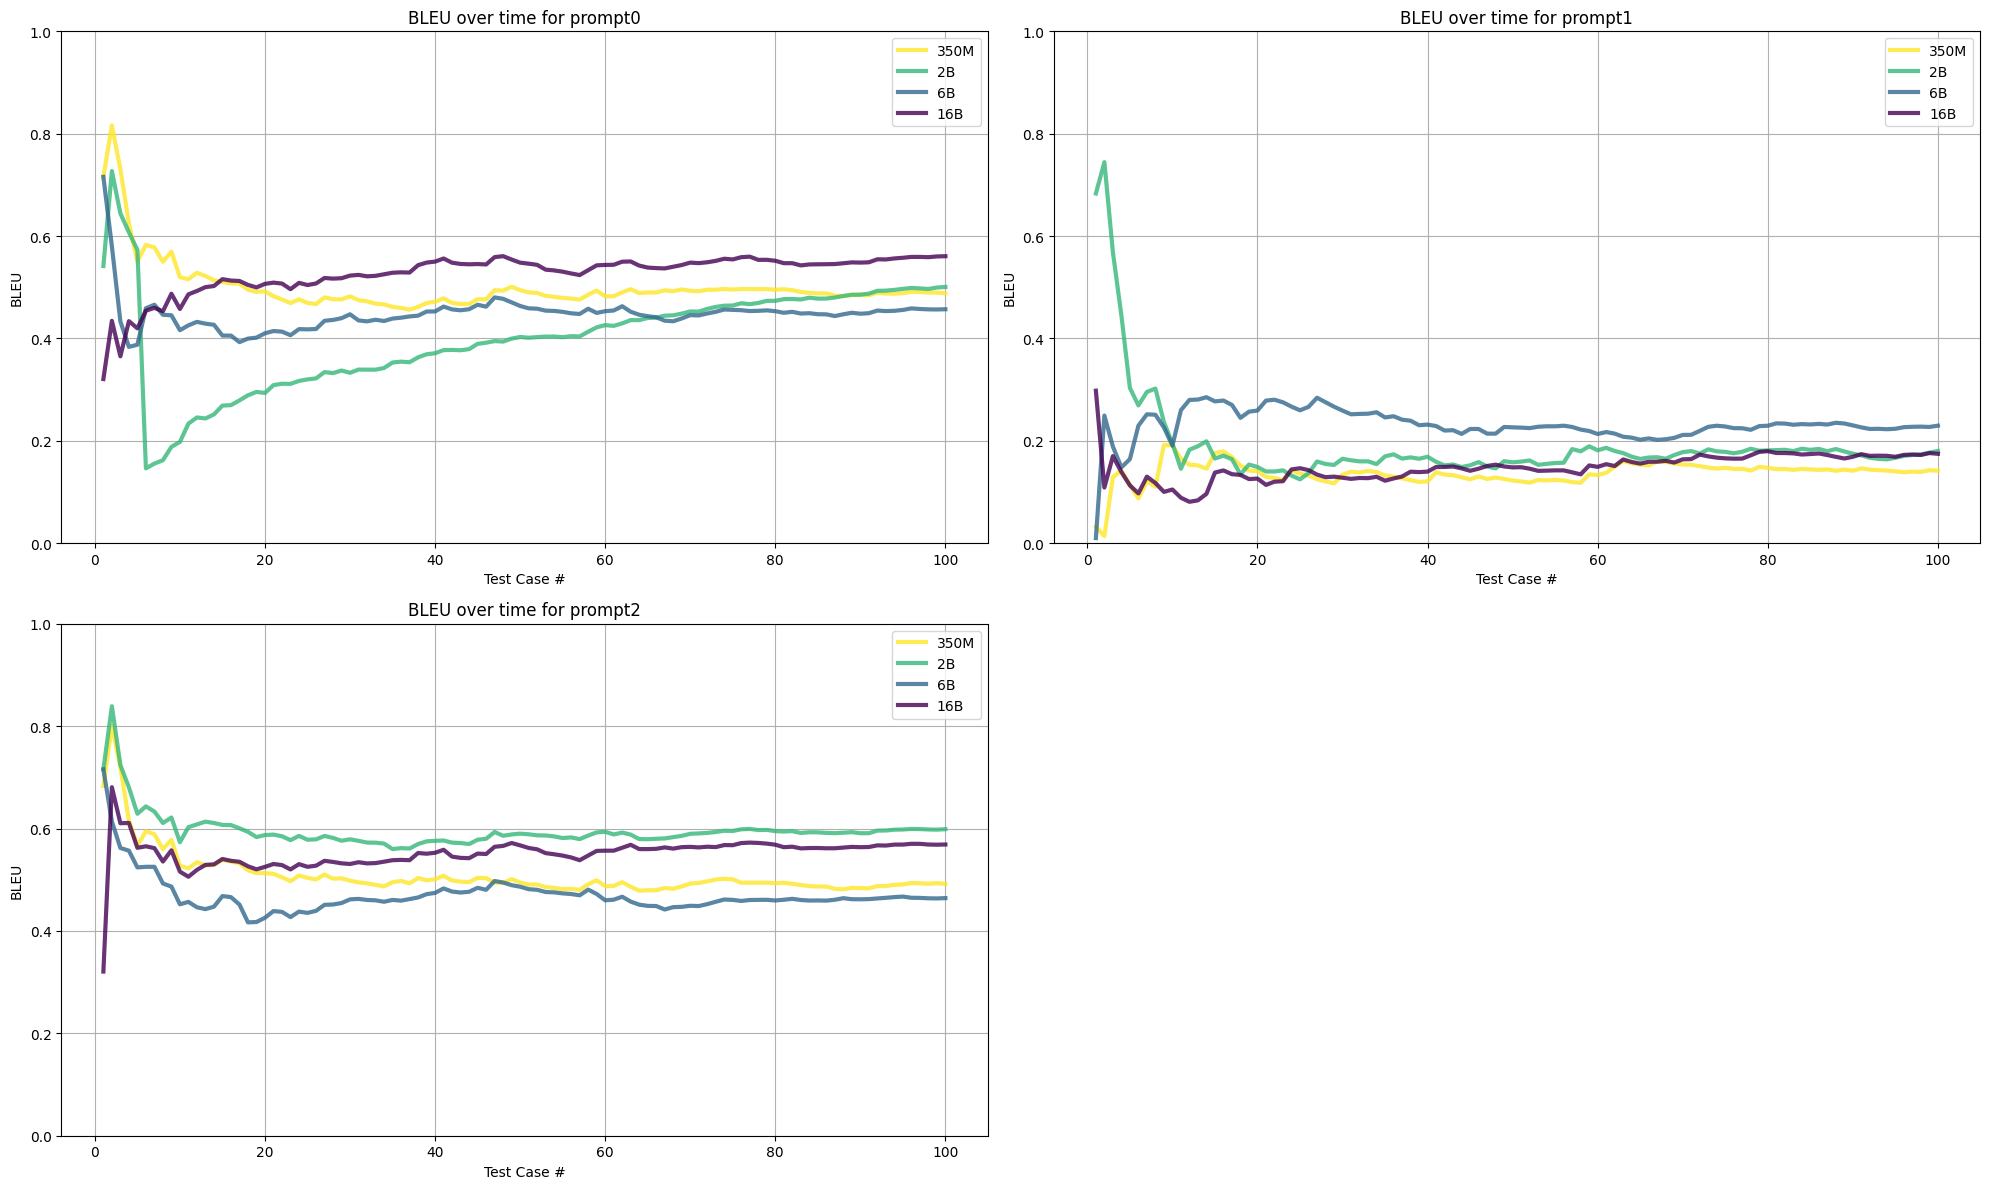

/usr/local/lib/python3.8/dist-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


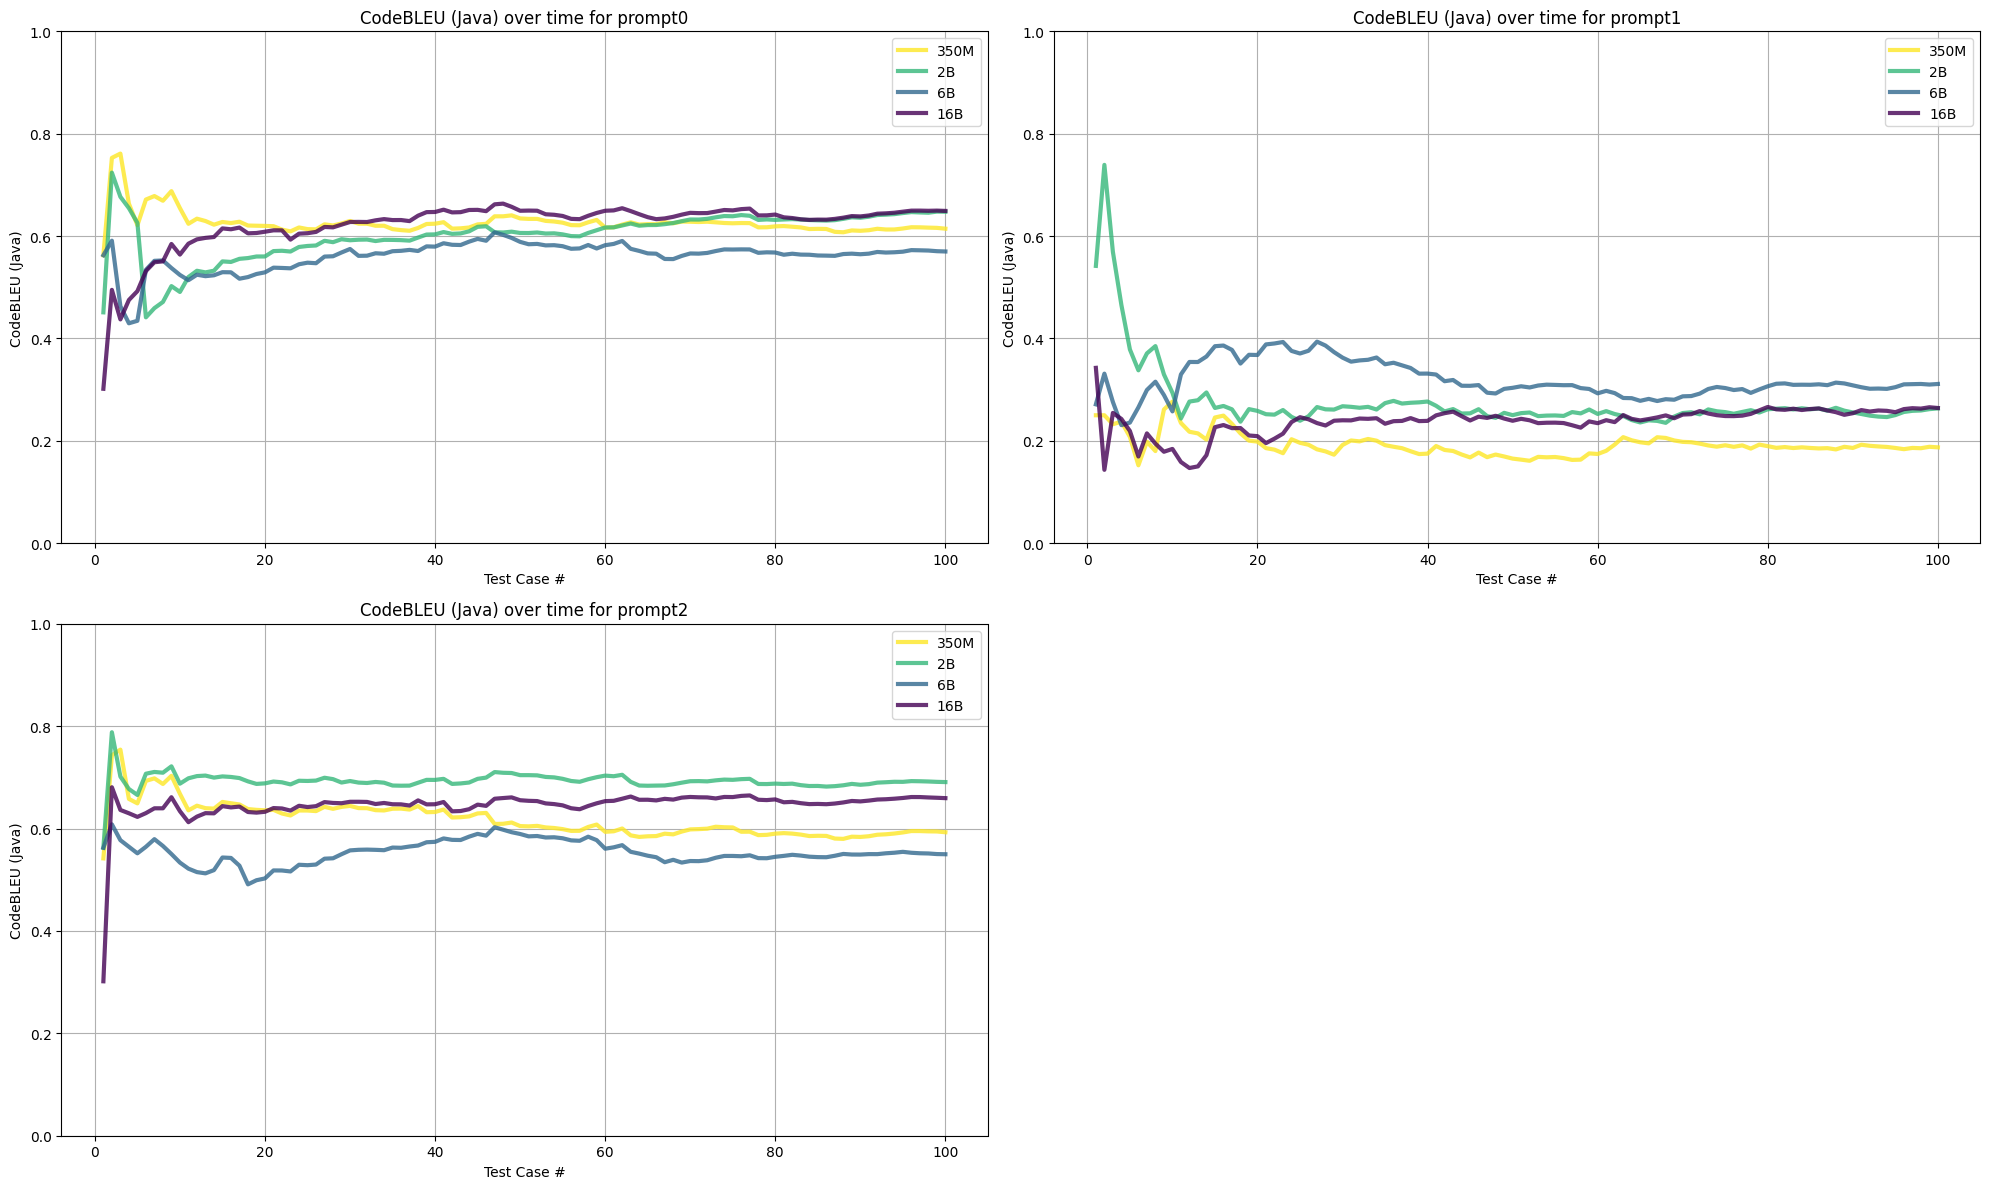

In [5]:
metrics = [ metric.BLEU, metric.CodeBLEUJava ]

for test_metric in metrics:
    # TODO: use cache
    datapoints = runner_b2f.calculate_iterative_metric(test_metric)
    runner_b2f.render_iterative_metric(test_metric, datapoints=datapoints)

## Bootstrapping

Saved figure to figs/b2f-bootstrap-all.png


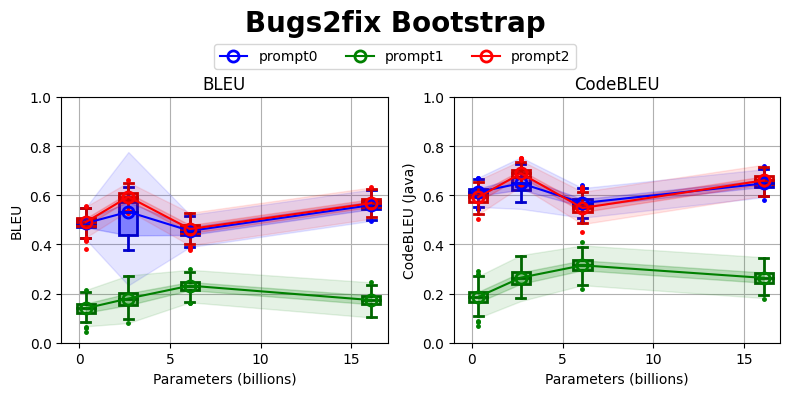

In [24]:
runner_b2f.multi_bootstrap(
    metrics=[ metric.BLEU, metric.CodeBLEUJava ],
    title=f"{runner_b2f.display_name} Bootstrap",
    sample_size=sample_size,
    iterations=iterations,
    use_cache=True,
    seed=SEED,
    save="figs/b2f-bootstrap-all.png",
)

# Bugs2Fix (Checklist)

In [6]:
runner_b2f_cl = BatteryRunner.of(BatteryConfigs.Bugs2FixChecklist)
runner_b2f_cl.load_cases()

Loaded 100 cases!
Loading base config (does not run base config battery)...
Loaded 100 cases!


In [7]:
family = ModelFamily.CodeGen1.multi
runner_b2f_cl.run_battery(family=family, quiet=True)
runner_b2f_cl.init_cases(family=family)

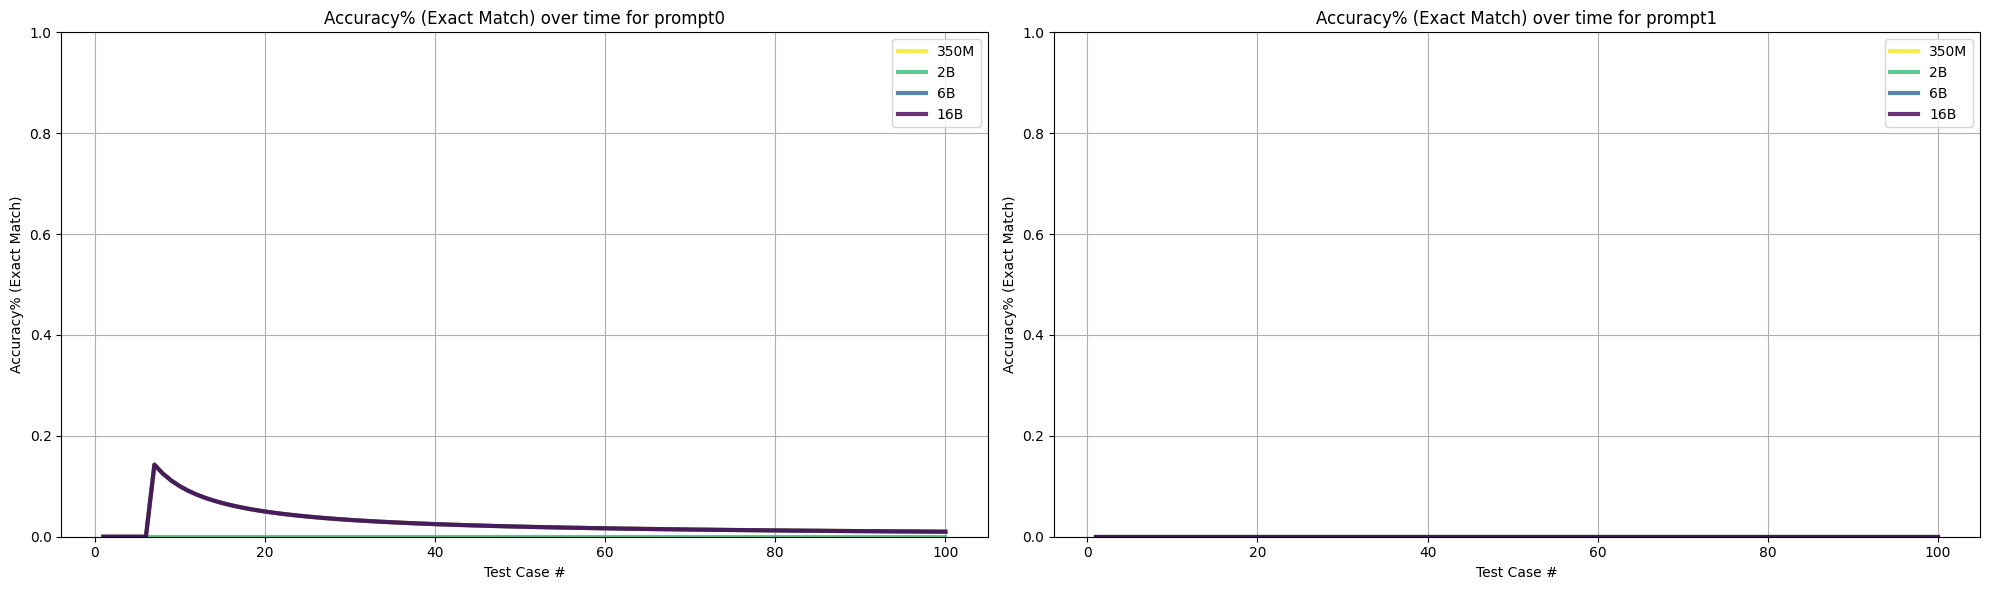

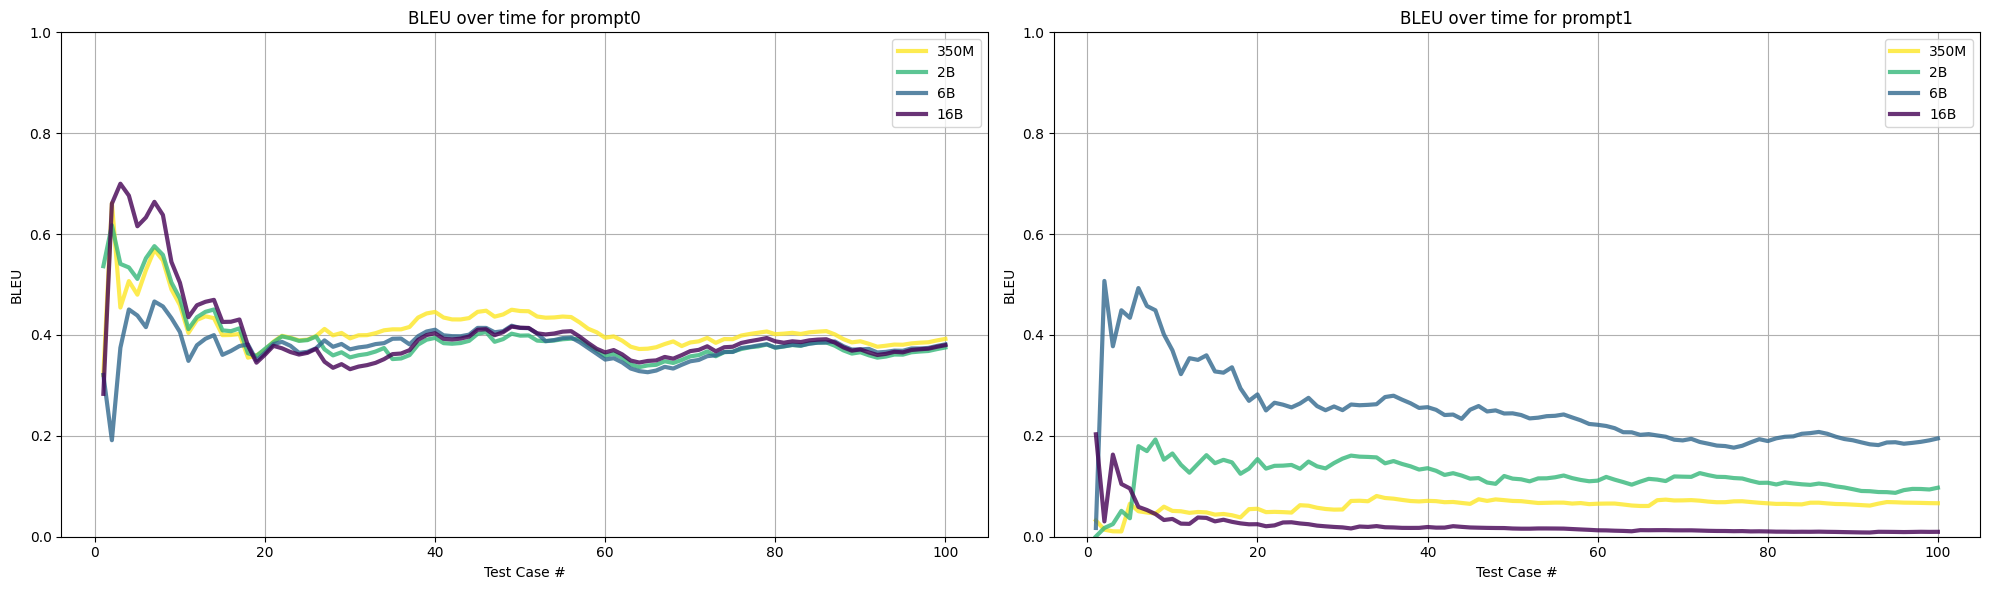

/usr/local/lib/python3.8/dist-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


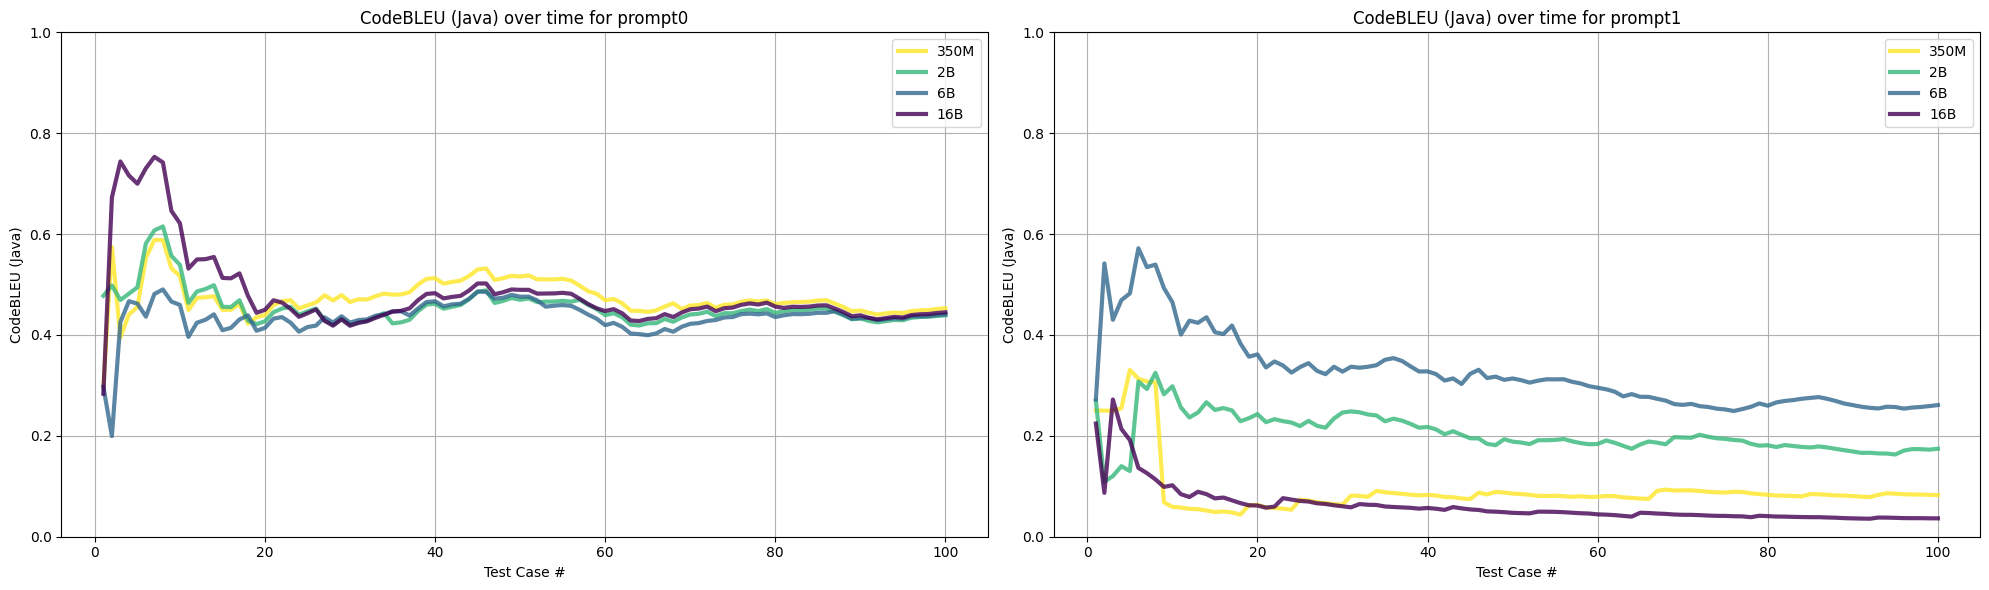

In [5]:
metrics = [ metric.ExactMatch, metric.BLEU, metric.CodeBLEUJava ]

for test_metric in metrics:
    datapoints = runner_b2f_cl.calculate_iterative_metric(test_metric)
    runner_b2f_cl.render_iterative_metric(test_metric, datapoints=datapoints)

## Bootstrap

Saved figure to figs/b2f-cl-bootstrap-all.png


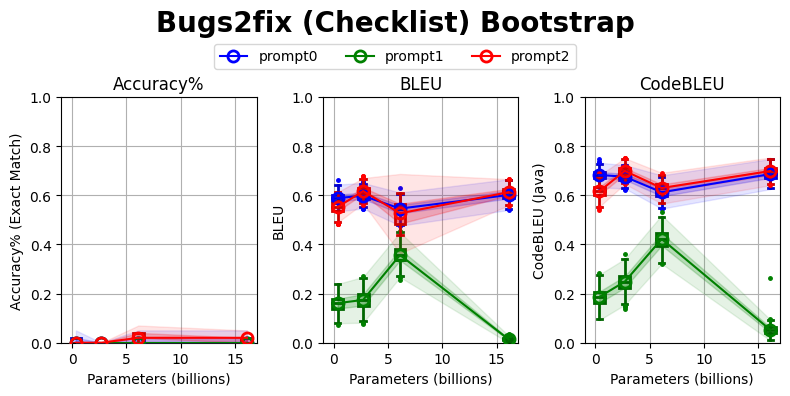

In [23]:
runner_b2f_cl.multi_bootstrap(
    metrics=[ metric.ExactMatch, metric.BLEU, metric.CodeBLEUJava ],
    title=f"{runner_b2f_cl.display_name} Bootstrap",
    sample_size=sample_size,
    iterations=iterations,
    use_cache=True,
    seed=SEED,
    save="figs/b2f-cl-bootstrap-all.png",
)

# Code2Code

In [14]:
runner_c2c = BatteryRunner.of(BatteryConfigs.Code2Code)
runner_c2c.load_cases()

Loaded 100 cases!


In [15]:
# make sure battery is already generated
# if this is taking a while to run, it's probably generating new test cases!

family = ModelFamily.CodeGen1.multi
runner_c2c.run_battery(family=family, quiet=True)
runner_c2c.init_cases(family=family)

## Iterative Progress

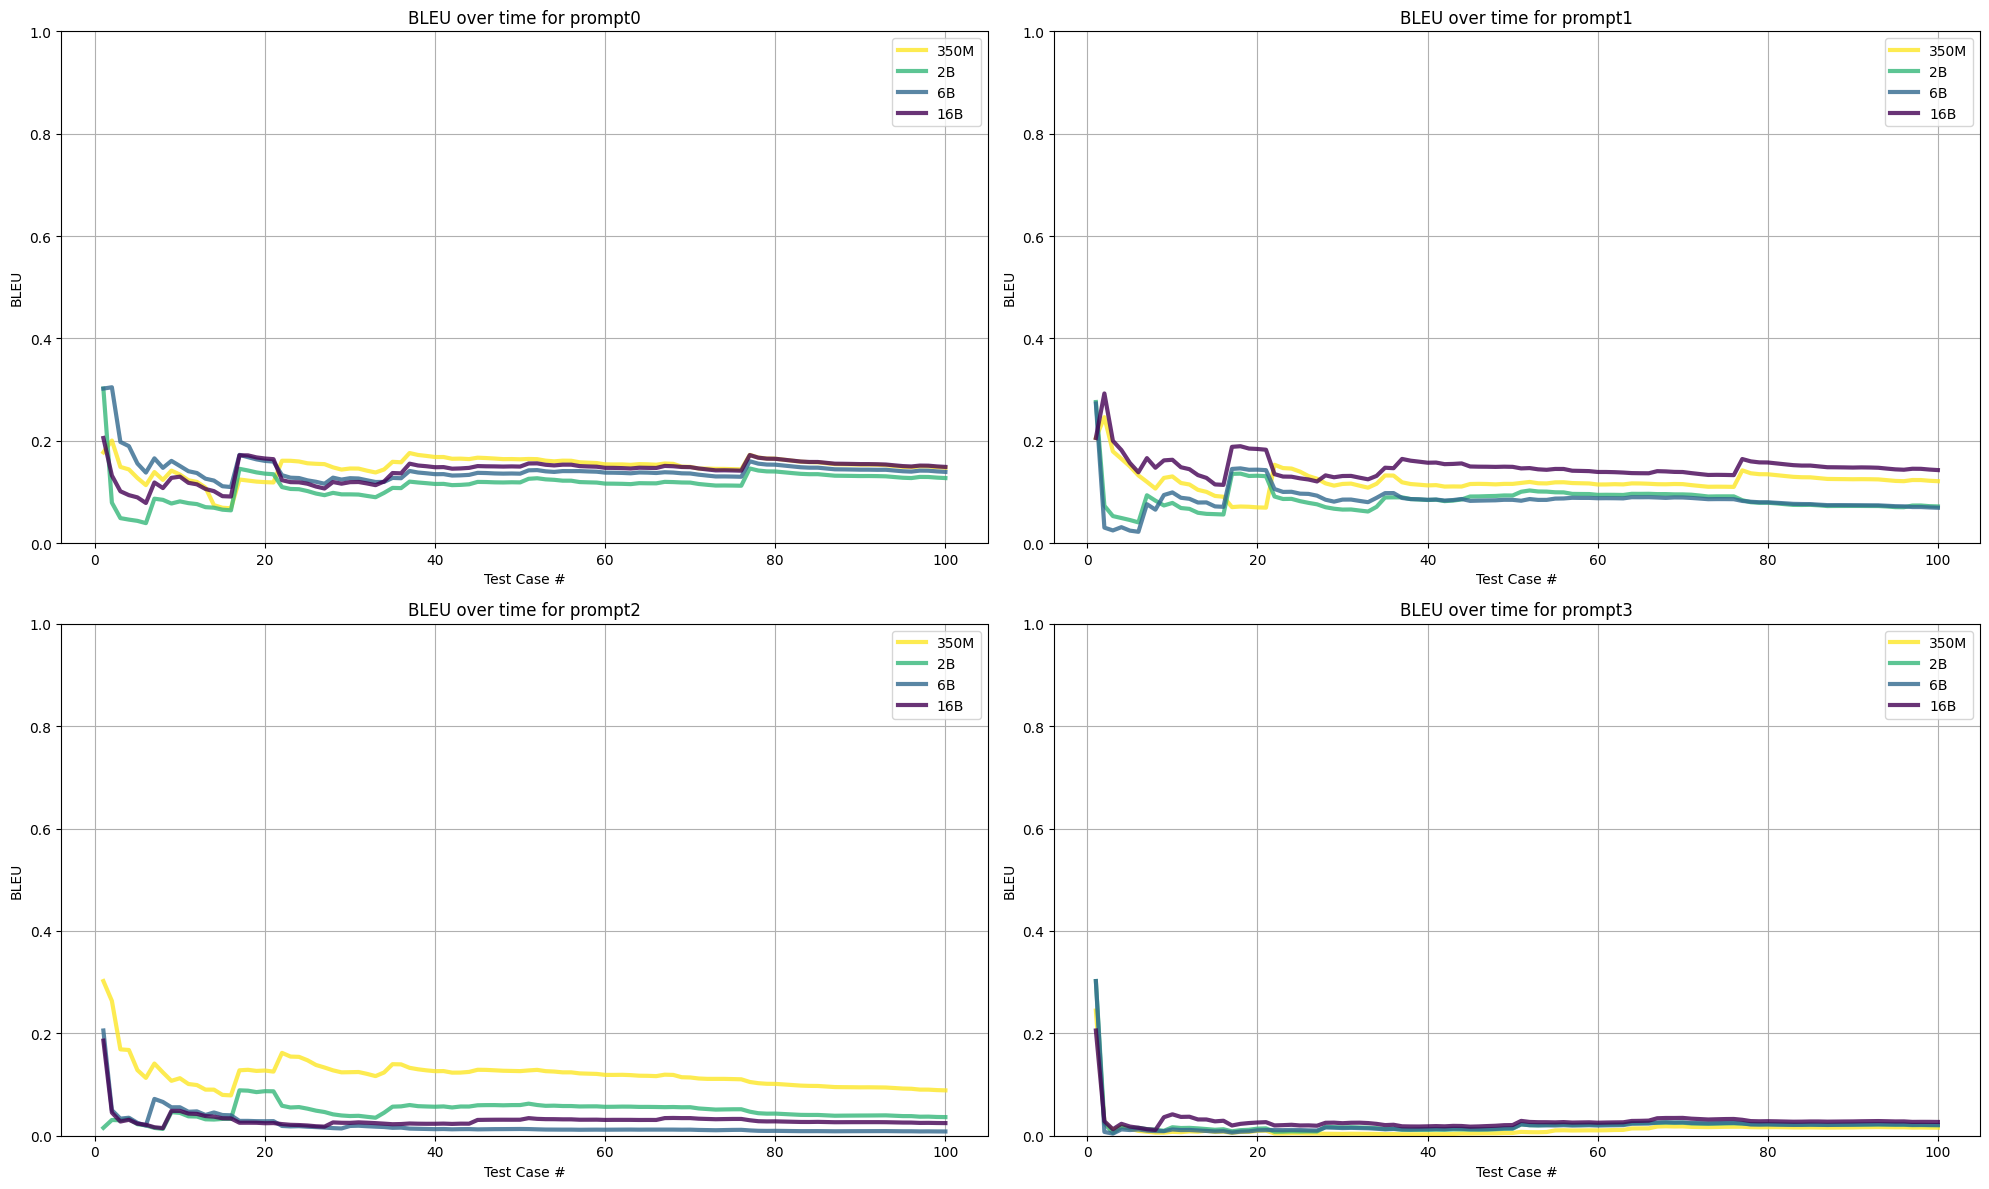

/usr/local/lib/python3.8/dist-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


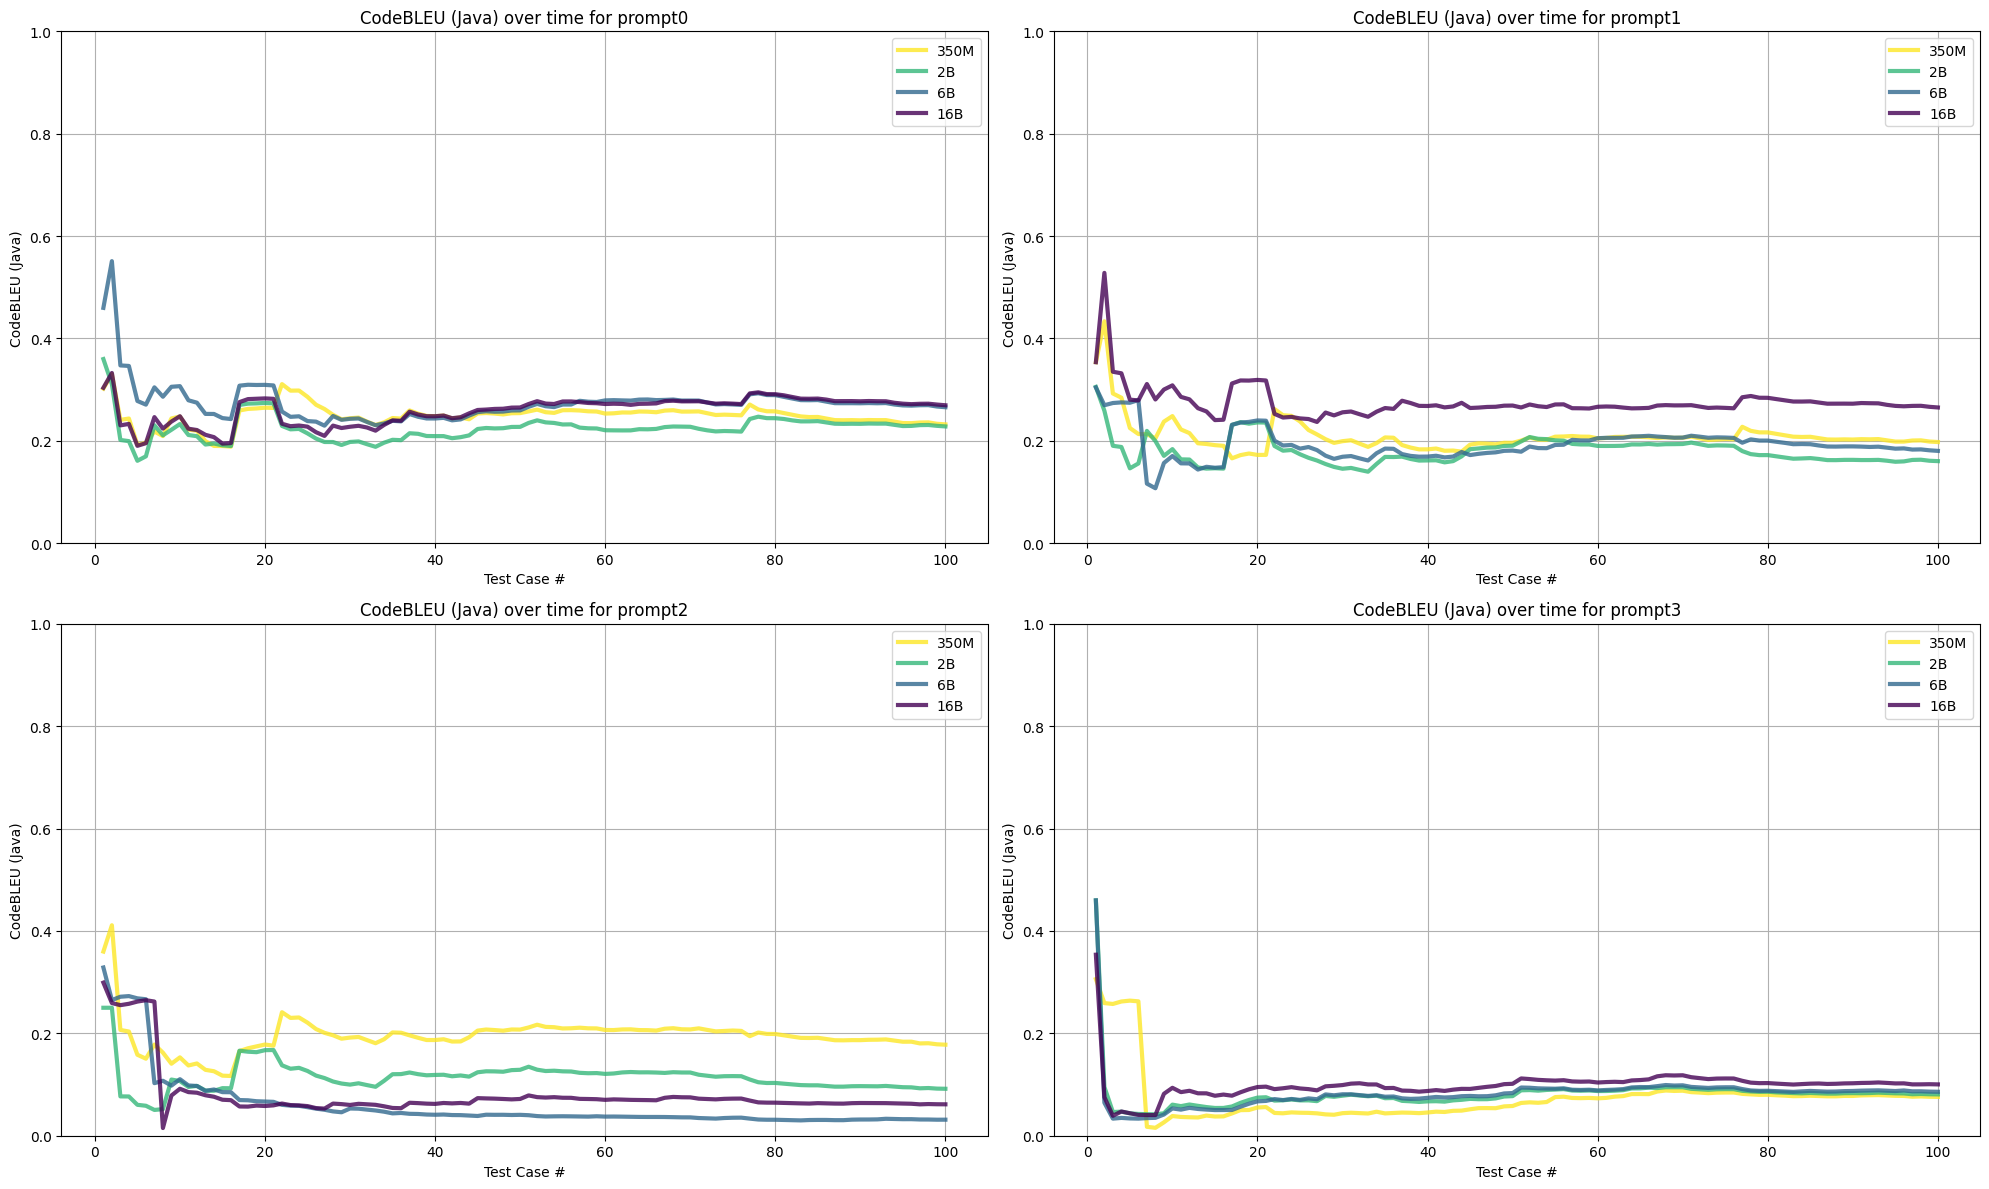

In [12]:
metrics = [ metric.BLEU, metric.CodeBLEUJava ]

for test_metric in metrics:
    datapoints = runner_c2c.calculate_iterative_metric(test_metric)
    runner_c2c.render_iterative_metric(test_metric, datapoints=datapoints)

## Bootstrapping

Saved figure to figs/c2c-bootstrap-all.png


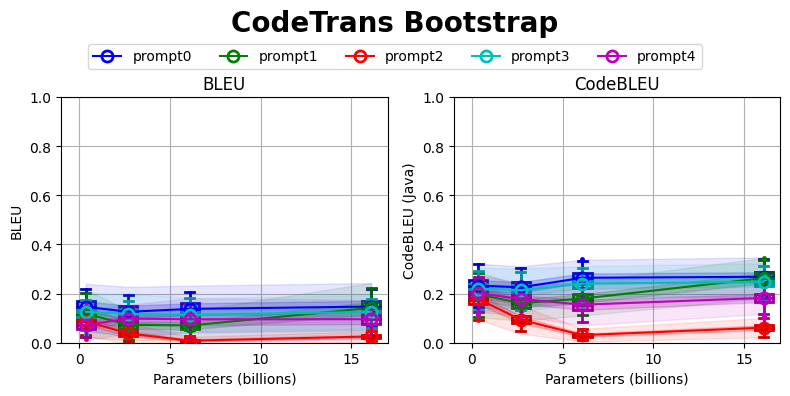

In [25]:
runner_c2c.multi_bootstrap(
    metrics=[ metric.BLEU, metric.CodeBLEUJava ],
    title=f"{runner_c2c.display_name} Bootstrap",
    sample_size=sample_size,
    iterations=iterations,
    use_cache=True,
    seed=SEED,
    save="figs/c2c-bootstrap-all.png",
)

In [18]:
#runner_c2c.multi_bootstrap(
#    metrics=[ metric.BLEU, metric.CodeBLEUJava ],
#    title=f"{runner_c2c.display_name} Bootstrap",
#    sample_size=sample_size,
#    iterations=iterations,
#    use_cache=True,
#    seed=SEED,
#    save="figs/c2c-bootstrap-all.png",
#)

Saved figure to figs/c2c-bootstrap-bleu.png


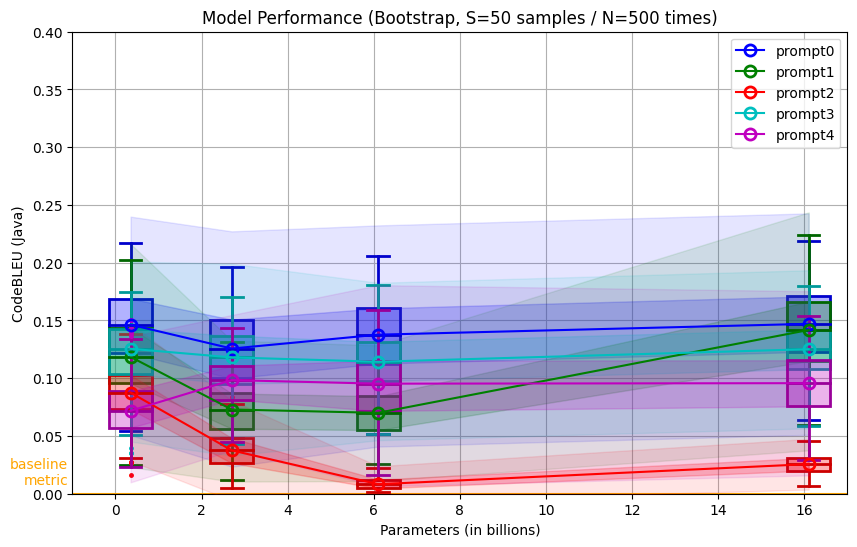

In [23]:
runner_c2c.render_metric(
    test_metric,
    by_prompt=by_prompt_bleu_c2c,
    title=f"Model Performance (Bootstrap, S={sample_size} samples / N={iterations} times)",
    y_max=0.4,
    save="figs/c2c-bootstrap-bleu.png",
)
None

In [19]:
test_metric = metric.CodeBLEUJava

# consistency for testing
by_prompt_codebleu_c2c = runner_c2c.calculate_bootstrap_metric(
    test_metric,
    sample_size=sample_size,
    iterations=iterations,
    use_cache=True,
    seed=SEED,
)

/usr/local/lib/python3.8/dist-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


In [19]:
#runner_c2c.render_metric(
#    test_metric,
#    by_prompt=by_prompt_codebleu_c2c,
#    title=f"Model Performance (Bootstrap, S={sample_size} samples / N={iterations} times)",
#    y_max=0.4,
#    save="figs/c2c-bootstrap-codebleu.png",
#)
#None